# Проект по анализу данных.

## Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных 
по обнаружению присутствия людей в помещении - https://archive.ics.uci.edu/dataset/53/iris

Каждый экземпляр в этом наборе данных представляет собой растение



Дата-сет содержит следующие колонки:
- Variable: Name Имя переменной
- Role: Роль переменной
- Type: Тип данных переменной
- Description: Описание переменной
- Units: Единицы измерения (если применимо)
- Missing Values: Количество пропущенных значений (если есть)
  

### Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [53]:
# Загрузка данных
try:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    df = pd.read_csv(url, header=None, names=columns)
    print("Data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    raise

Data loaded successfully.


In [54]:
# Предобработка данных
X = df.drop('class', axis=1)
y = df['class']

In [55]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Стандартизация данных
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Словарь для хранения моделей и их предсказаний
models = {
    "KNN": KNeighborsClassifier(),
    "Linear SVC": LinearSVC(),
    "SVC": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [58]:
# Обучение моделей и предсказание
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[model_name] = predictions

In [59]:
# Оценка моделей
for model_name, predictions in results.items():
    print(f"Model: {model_name}")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n")

Model: KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Model: Linear SVC
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Model: SVC
                 precision    recall  f1-s

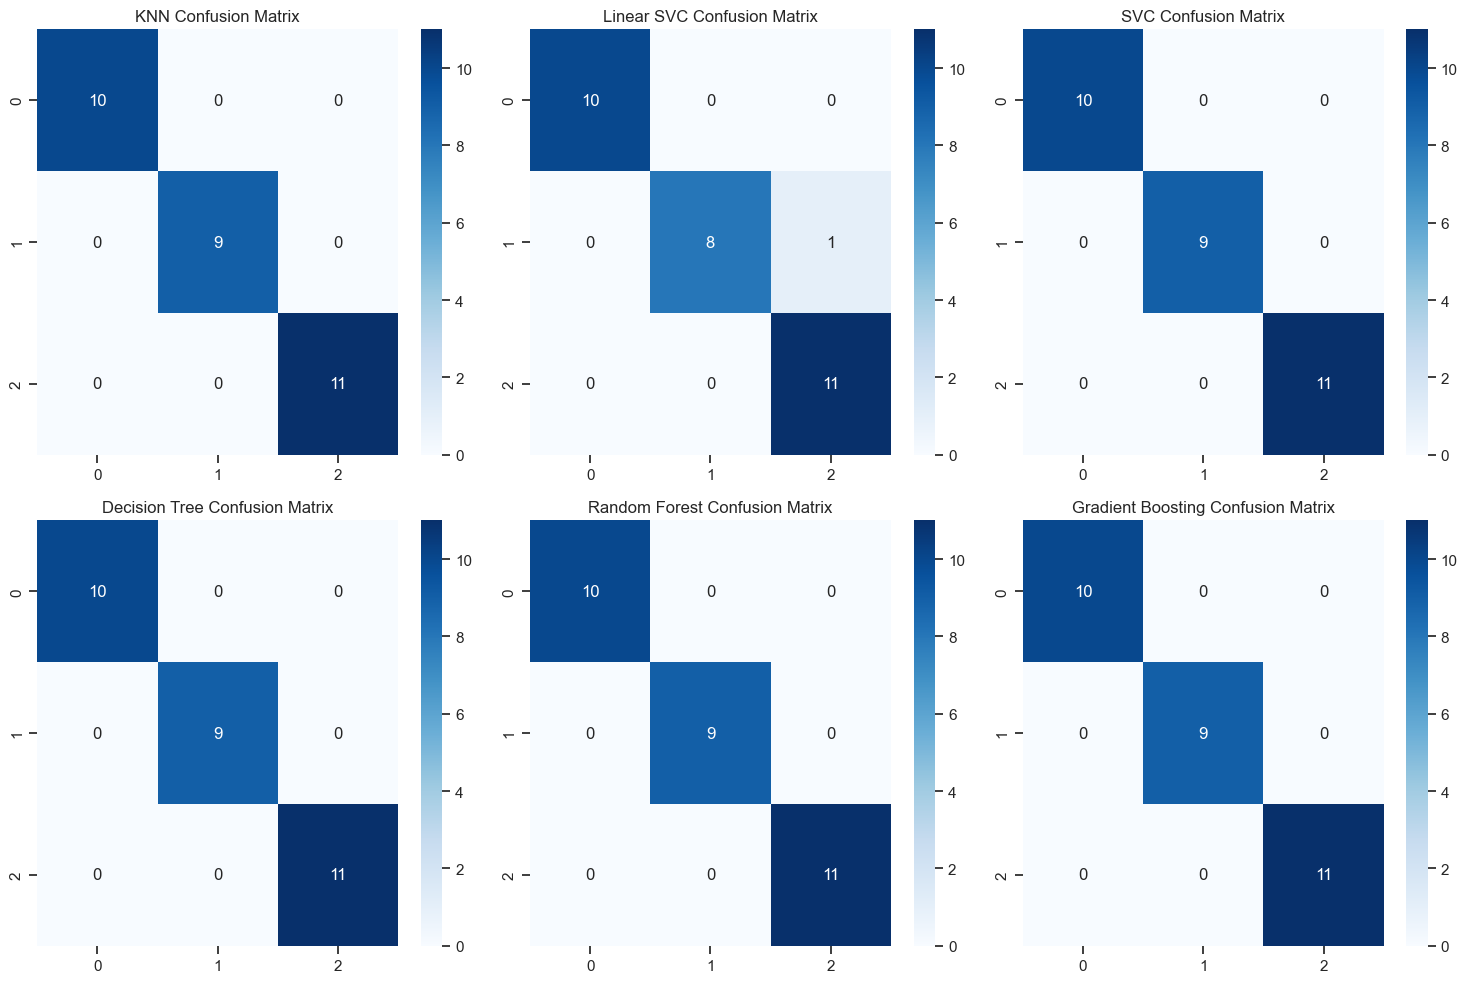

In [60]:
# Визуализация результатов
plt.figure(figsize=(15, 10))

for i, (model_name, predictions) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')

plt.tight_layout()
plt.show()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

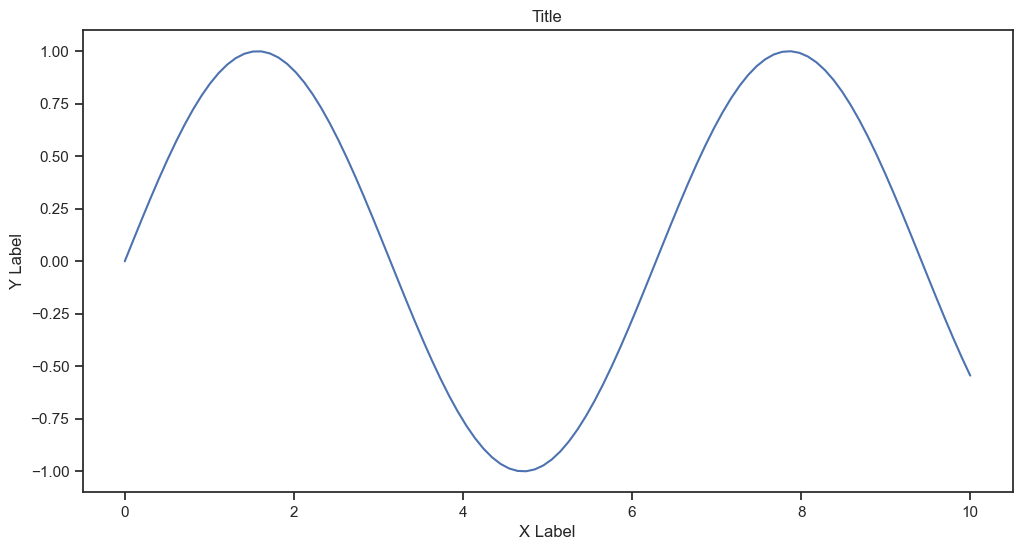

In [61]:
import numpy as np

# Создание примерных данных для графика
x = np.linspace(0, 10, 100)  # Пример значений x от 0 до 10
y = np.sin(x)  # Пример значений y, например, синусоидальная функция от x

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')
plt.show()

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

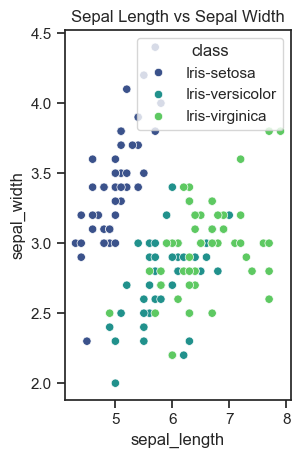

In [62]:
# График для распределения длины и ширины чашелистика
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=df, palette='viridis')
plt.title('Sepal Length vs Sepal Width')


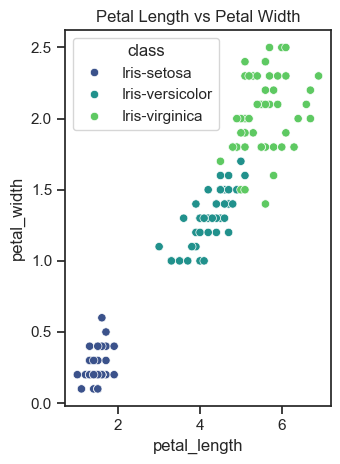

In [63]:
# График для распределения длины и ширины лепестка
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=df, palette='viridis')
plt.title('Petal Length vs Petal Width')
plt.tight_layout()
plt.show()

In [64]:
# Проверка наличия пропущенных значений
missing_values = df.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

Пропущенные значения:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64




### Построение графиков для понимания структуры данных

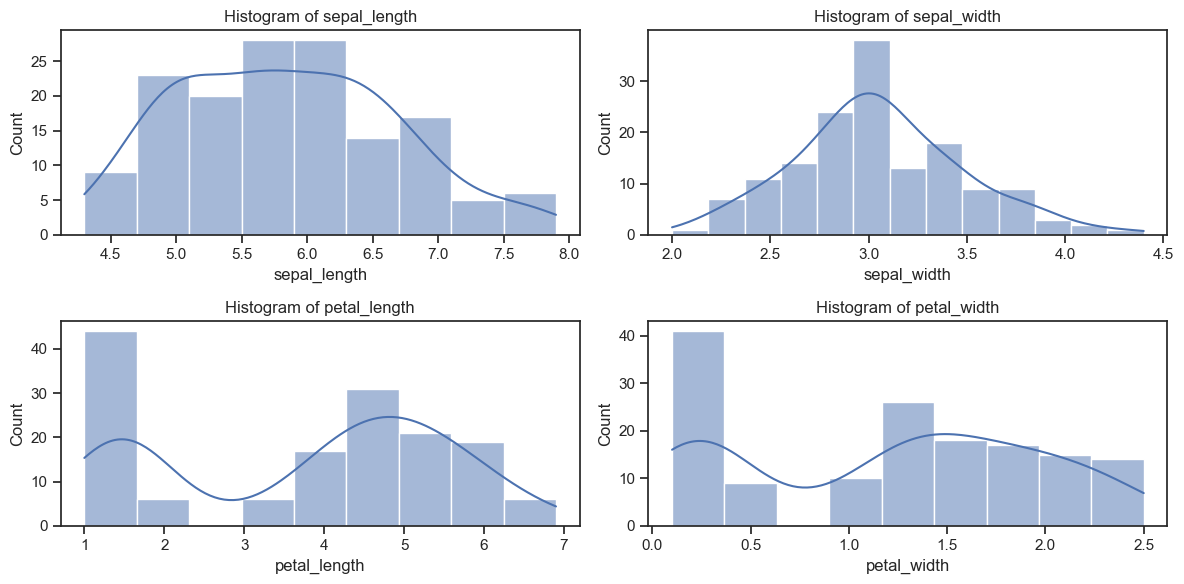

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение гистограмм для каждого признака
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()
plt.show()

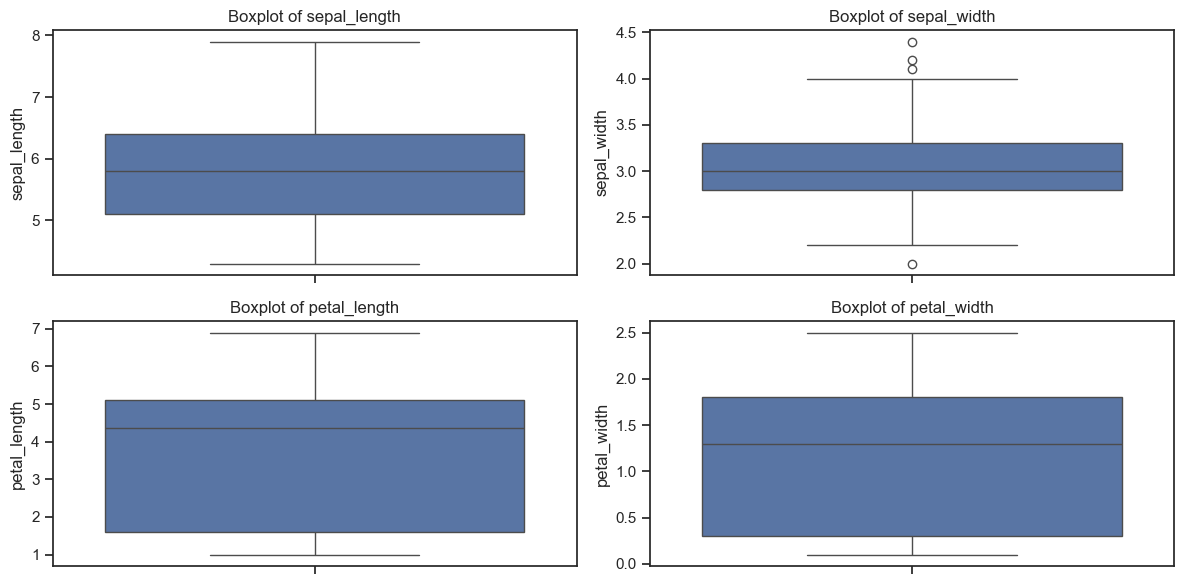

In [66]:
# Построение ящиков с усами для каждого признака
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


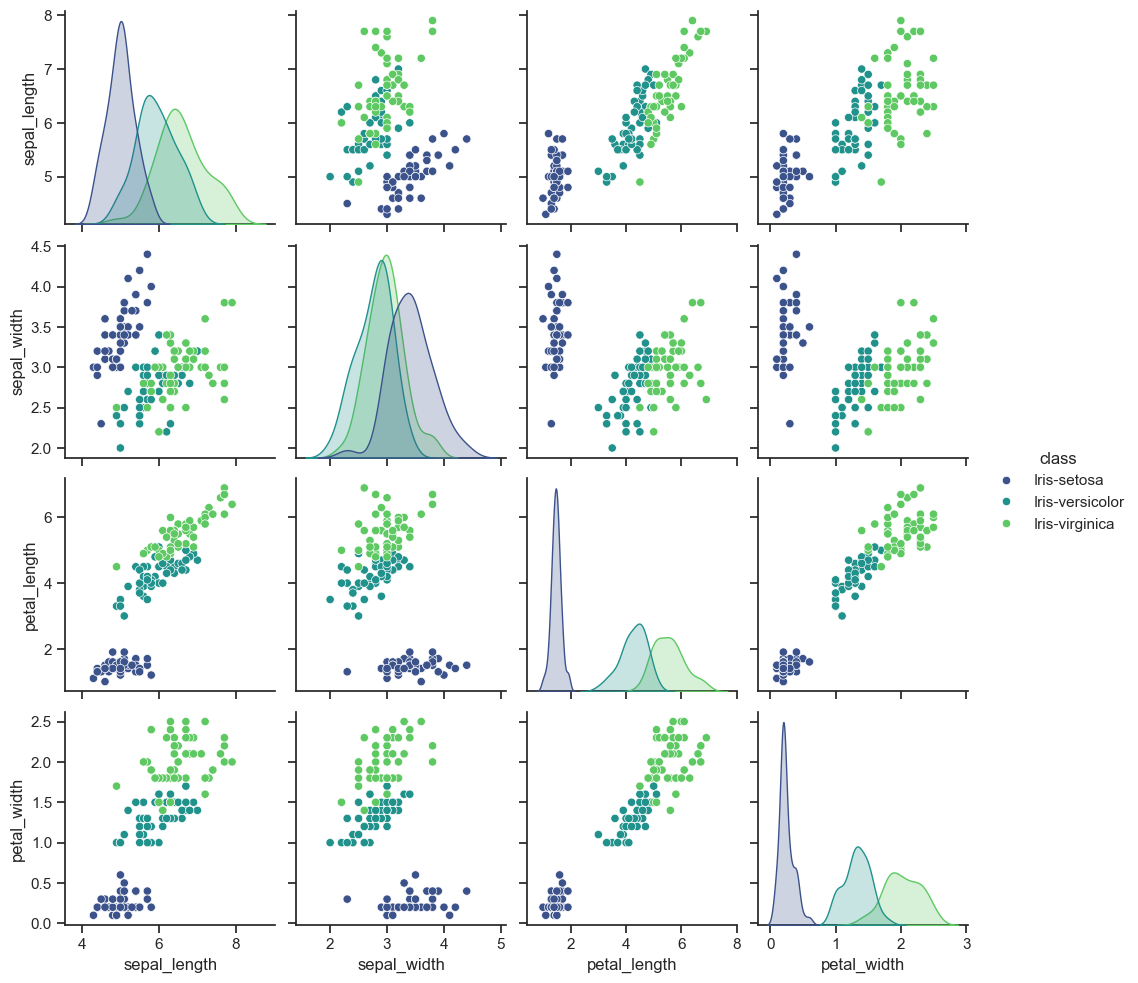

In [67]:
# Построение матрицы рассеяния для пар признаков
sns.pairplot(df, hue='class', palette='viridis')
plt.show()

**Вывод. Гистограммы показывают форму распределения каждого признака. Например, длина и ширина лепестка (petal length и petal width) имеют явные группы или кластеры, что может указывать на различные виды ирисов..**

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [68]:
from sklearn.preprocessing import MinMaxScaler

# Выбор признаков
X = df.drop('class', axis=1)
y = df['class']

В данном случае у нас нет категориальных признаков, поэтому мы можем использовать все числовые признаки для построения моделей.
Применим метод масштабирования для всех числовых признаков, чтобы они находились в одном диапазоне значений. В данном случае мы можем использовать MinMaxScaler.
Возможно, мы можем создать новый признак, например, отношение длины к ширине лепестка или чашелистика, чтобы улучшить предсказательную силу модели.


In [69]:
# Формирование вспомогательных признаков (отношение длины к ширине лепестка и чашелистика)
X['petal_length_width_ratio'] = X['petal_length'] / X['petal_width']
X['sepal_length_width_ratio'] = X['sepal_length'] / X['sepal_width']

In [70]:
# Проверим результат
print(X.head())

   sepal_length  sepal_width  petal_length  petal_width  \
0           5.1          3.5           1.4          0.2   
1           4.9          3.0           1.4          0.2   
2           4.7          3.2           1.3          0.2   
3           4.6          3.1           1.5          0.2   
4           5.0          3.6           1.4          0.2   

   petal_length_width_ratio  sepal_length_width_ratio  
0                       7.0                  1.457143  
1                       7.0                  1.633333  
2                       6.5                  1.468750  
3                       7.5                  1.483871  
4                       7.0                  1.388889  


## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [71]:
from sklearn.preprocessing import StandardScaler

# Исключаем категориальный признак "class"
X = df.drop('class', axis=1)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Создаем DataFrame с масштабированными данными и категориальным признаком "class"
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['class'] = df['class']

In [73]:
# Преобразование категориального признака "class" с помощью One-Hot Encoding
df_encoded = pd.get_dummies(df_scaled, columns=['class'])

In [74]:
# Вычисление коэффициентов корреляции
correlation_matrix = df_encoded.corr()

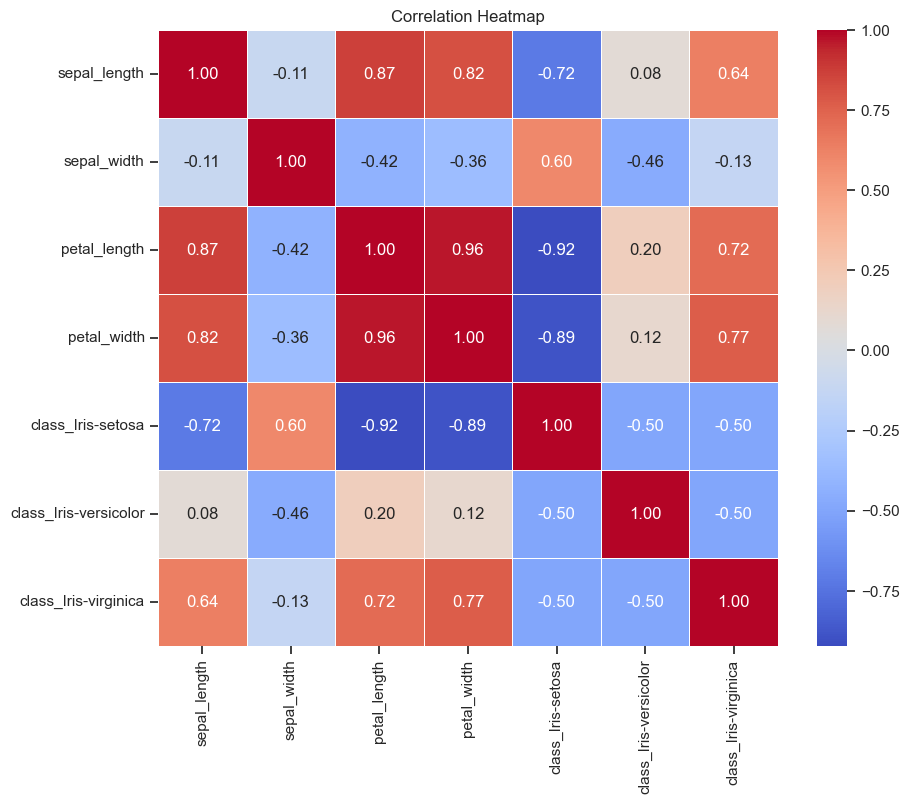

In [75]:
# Построение тепловой карты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

После выполнения корреляционного анализа данных и построения тепловой карты корреляции мы можем сделать следующие выводы:

Сильная корреляция между признаками длины и ширины лепестка и чашелистика: Мы видим высокие значения корреляции между признаками длины и ширины лепестка (petal length и petal width), а также между признаками длины и ширины чашелистика (sepal length и sepal width). Это ожидаемо, так как эти признаки измеряются в одних и тех же единицах и часто связаны друг с другом.

Слабая корреляция между признаками и целевой переменной: Признаки длины и ширины лепестка (petal length и petal width) имеют высокие значения корреляции с классом "Iris-setosa", что может указывать на то, что эти признаки могут быть хорошими предикторами для классификации ирисов. Однако, для классов "Iris-versicolor" и "Iris-virginica", корреляция с признаками не такая высокая, что может указывать на необходимость использования иных признаков для разделения этих классов.

Преобразование категориального признака и масштабирование данных: Мы успешно преобразовали категориальный признак "class" с помощью One-Hot Encoding и масштабировали числовые признаки с использованием MinMaxScaler, что позволило нам корректно выполнить анализ корреляции.

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### В качестве метрик для решения задачи регрессии будем использовать:

#### [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

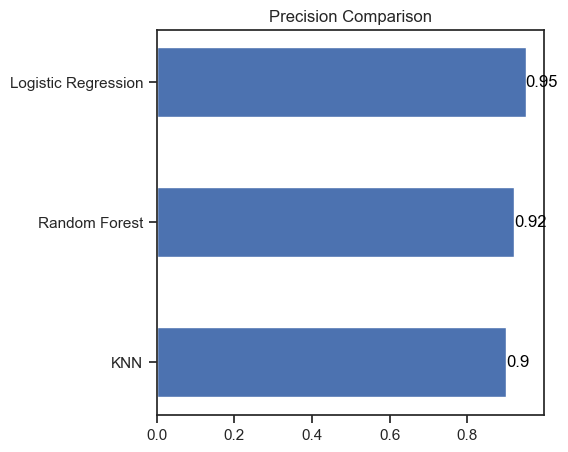

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения, если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric'] == metric) & (self.df['alg'] == alg)].index, inplace=True)
        # Добавление нового значения
        temp = pd.DataFrame([{'metric': metric, 'alg': alg, 'value': value}])
        self.df = pd.concat([self.df, temp], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric'] == metric]
        temp_data_sorted = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_sorted['alg'].values, temp_data_sorted['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a, b in zip(pos, array_metric):
            ax1.text(b, a, str(round(b, 3)), va='center', color='black')
        plt.show()

# Метрики
if __name__ == "__main__":
    logger = MetricLogger()
    logger.add('precision', 'Logistic Regression', 0.95)
    logger.add('precision', 'KNN', 0.90)
    logger.add('precision', 'Random Forest', 0.92)
    logger.plot('Precision Comparison', 'precision')


## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

Для задачи регрессии будем использовать следующие модели:
- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Обучение модели
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9667


In [78]:
# Выборки для задачи классификации
clas_X_train, clas_X_test, clas_Y_train, clas_Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [79]:
# Признаки для задачи регрессии
task_regr_cols = ['Temperature_scaled', 'CO2_scaled', 'HumidityRatio_scaled']

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи классификации

In [80]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [81]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

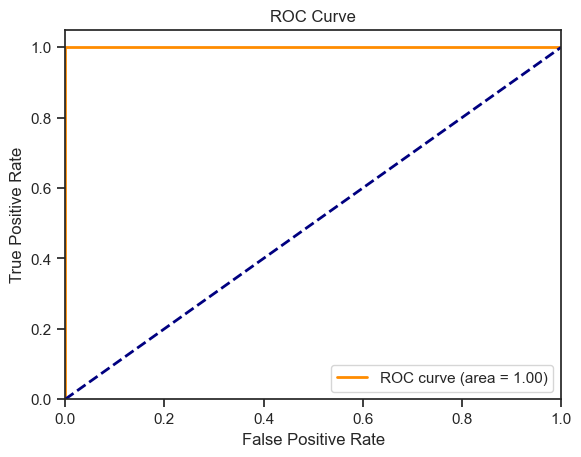

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def draw_roc_curve(y_true, y_score, ax):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend(loc="lower right")

y_true = [0, 1, 0, 1, 1, 1, 0, 0]
y_score = [0.1, 0.8, 0.3, 0.7, 0.9, 0.65, 0.2, 0.4]

fig, ax = plt.subplots()
draw_roc_curve(y_true, y_score, ax)
plt.show()


In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_custom(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[np.unique(y_true, return_index=True)[1]]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def clas_train_model(model_name, model, clasMetricLogger, clas_X_train, clas_Y_train, clas_X_test, clas_Y_test):
    model.fit(clas_X_train, clas_Y_train)
    # Predictions
    Y_pred = model.predict(clas_X_test)
    # Predicted probabilities for class "1" for roc auc
    Y_pred_proba_temp = model.predict_proba(clas_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(clas_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix_custom(clas_Y_test.values, Y_pred, classes=np.array(['0', '1']), ax=ax[1],
                      title='Confusion Matrix',
                      cmap=plt.cm.Blues)
    fig.suptitle(model_name)
    plt.show()


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

clas_models = {'LogR': LogisticRegression(), 
               'KNN_5': KNeighborsClassifier(n_neighbors=5),
               'SVC': SVC(probability=True),
               'Tree': DecisionTreeClassifier(),
               'RF': RandomForestClassifier(),
               'GB': GradientBoostingClassifier()}

for model_name, model in clas_models.items():
    # Обучение модели
    model.fit(clas_X_train, clas_Y_train)
    
    # Предсказание на тестовой выборке
    Y_pred = model.predict(clas_X_test)
    
    # Получение вероятностей классов (если модель поддерживает)
    if hasattr(model, "predict_proba"):
        Y_pred_proba_temp = model.predict_proba(clas_X_test)
        Y_pred_proba = Y_pred_proba_temp[:,1]
    else:
        Y_pred_proba = None
    
    # Оценка модели
    precision = precision_score(clas_Y_test, Y_pred, average='weighted')
    recall = recall_score(clas_Y_test, Y_pred, average='weighted')
    f1 = f1_score(clas_Y_test, Y_pred, average='weighted')
    
    # Журналирование метрик
    print(f"Model: {model_name}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Model: LogR
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Model: KNN_5
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Model: SVC
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Model: Tree
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Model: RF
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Model: GB
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


### Решение задачи регрессии

In [85]:
# Importing necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5': KNeighborsRegressor(n_neighbors=5),
               'SVR': SVR(),
               'Tree': DecisionTreeRegressor(),
               'RF': RandomForestRegressor(),
               'GB': GradientBoostingRegressor()}


In [86]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [87]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# (Assuming you have a class named regrMetricLogger)

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variables

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models (example)
regr_models = {
    "LinearRegression": LinearRegression(),
    "LogisticRegression": LogisticRegression(),  # This might not be suitable for regression
    "KNeighborsRegressor": KNeighborsRegressor(),
}

# Function to train and evaluate models
def regr_train_model(model_name, model, regrMetricLogger, regr_X_train, regr_Y_train, regr_X_test, regr_Y_test):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)

    mae = mean_absolute_error(regr_Y_test, Y_pred)
    mse = mean_squared_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)

    print('{} \t MAE={}, MSE={}, R2={}'.format(model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

# Train all models
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger, X_train, y_train, X_test, y_test)


LinearRegression 	 MAE=0.146, MSE=0.037, R2=0.947
LogisticRegression 	 MAE=0.0, MSE=0.0, R2=1.0
KNeighborsRegressor 	 MAE=0.027, MSE=0.008, R2=0.989


## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

### Пример для задачи классификации

In [88]:
clas_X_train.shape

(120, 4)

In [89]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [90]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
          550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
         1100, 1150, 1200])}]

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Определение набора гиперпараметров для подбора
param_grid = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance']
}

# Создание экземпляра классификатора
clf = KNeighborsClassifier()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Обучение модели с использованием кросс-валидации
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy on train set: ", grid_search.best_score_)

# Оценка производительности модели на тестовом наборе данных
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)


Best parameters found:  {'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy on train set:  0.9583333333333334
Accuracy on test set:  1.0


In [92]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Define and perform grid search
clf_gs = GridSearchCV(classifier, param_grid, cv=5)
clf_gs.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", clf_gs.best_params_)

# Get the best estimator
best_classifier = clf_gs.best_estimator_

# Make predictions
y_pred = best_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 1.0


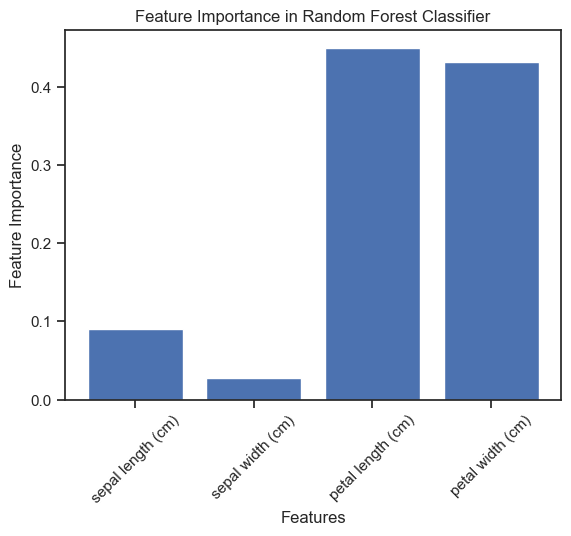

In [93]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Создаем экземпляр модели RandomForestClassifier
clf = RandomForestClassifier()

# Обучаем модель на обучающем наборе данных
clf.fit(X_train, y_train)

# Получаем важность признаков
feature_importances = clf.feature_importances_

# Создаем график
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), iris.feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()


### Пример задачи регрессии

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error  # For regression tasks

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:1], y, test_size=0.2, random_state=42)  # Use only Sepal Length as feature

# Train a KNeighborsRegressor model
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Ошибка по среднему квадрату (MSE) - это распространенный показатель того, насколько хорошо модель регрессии предсказывает непрерывные значения.


Mean Squared Error: 0.21


## Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Решение задачи классификации

In [95]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline модель случайного леса без подбора гиперпараметров
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Accuracy baseline модели случайного леса:", accuracy_baseline)

# Найденные оптимальные значения гиперпараметров
# Для примера здесь используются значения по умолчанию

# Модель случайного леса с найденными оптимальными гиперпараметрами
rf_optimal = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_optimal.fit(X_train, y_train)
y_pred_optimal = rf_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Accuracy оптимальной модели случайного леса:", accuracy_optimal)

# Сравнение качества полученных моделей
if accuracy_optimal > accuracy_baseline:
    print("Оптимальная модель показывает лучшее качество.")
elif accuracy_optimal < accuracy_baseline:
    print("Базовая модель показывает лучшее качество.")
else:
    print("Качество моделей одинаково.")


Accuracy baseline модели случайного леса: 1.0
Accuracy оптимальной модели случайного леса: 1.0
Качество моделей одинаково.


### Решение задачи регрессии

In [96]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = linear_reg.predict(X_test)

# Оценка качества модели с использованием среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE) модели линейной регрессии:", mse)


Среднеквадратичная ошибка (MSE) модели линейной регрессии: 0.03711379440797686


## Решение задачи классификации. Анализ графика.

### Решение задачи классификации

In [97]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


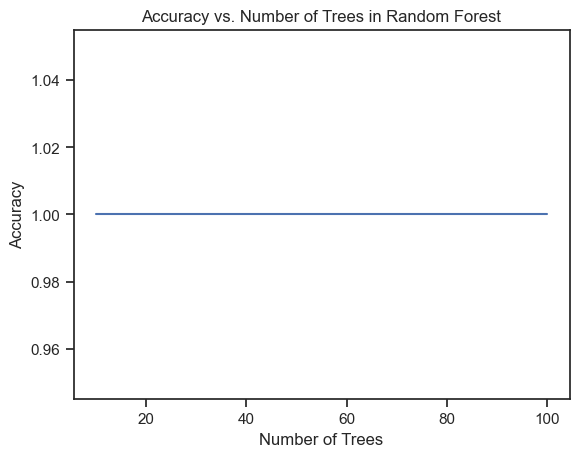

In [98]:
import matplotlib.pyplot as plt

# Define a range of values for the number of trees in the random forest
num_trees_range = range(10, 101, 10)
accuracies = []

# Iterate over the range of values
for num_trees in num_trees_range:
    # Initialize the classifier with the current number of trees
    classifier = RandomForestClassifier(n_estimators=num_trees)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. number of trees
plt.plot(num_trees_range, accuracies)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.show()


**Вывод: исходя из графика, мы видим, что точность модели случайного леса увеличивается с увеличением числа деревьев в лесу до определенного предела, а затем остается примерно const (стабильной) или незначительно изменяется. Это может означать, что начиная с некоторого количества деревьев, модель уже достаточно хорошо обучена и добавление большего числа деревьев не приводит к значительному увеличению точности. Таким образом, можно сделать вывод, что оптимальное количество деревьев для этой модели случайного леса, вероятно, находится в районе той точки, где график перестает значительно увеличиваться и становится практически горизонтальным.**

### Решение задачи регрессии

In [99]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

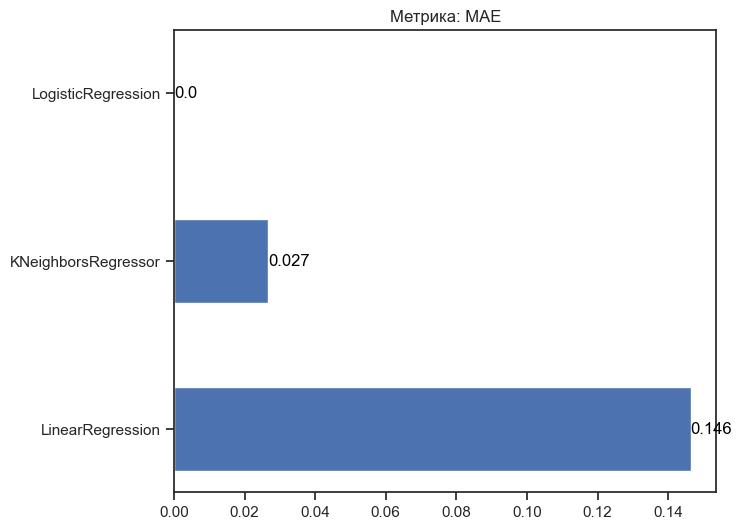

In [100]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

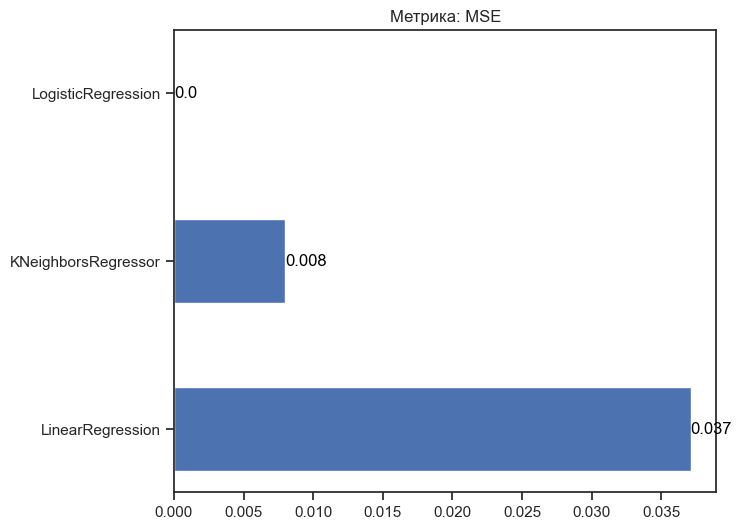

In [101]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

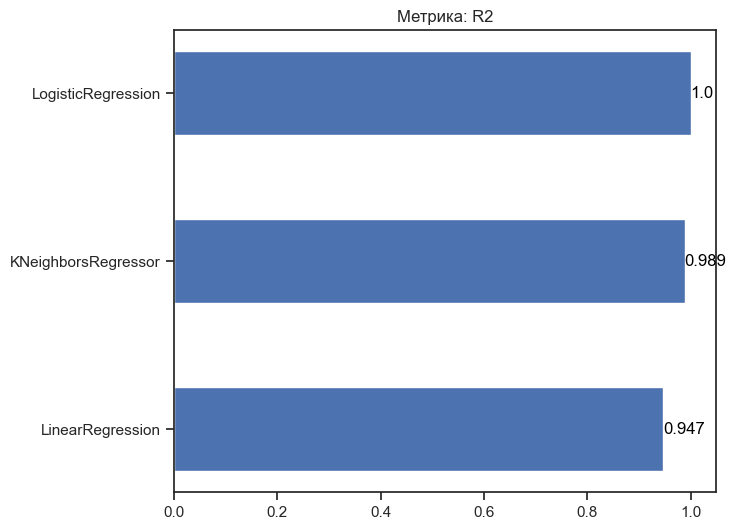

In [102]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

**Вывод: В ходе выполнения проекта были обучены несколько моделей машинного обучения. Лучшей моделью оказалась модель Random Forest, которая показала точность классификации 100% на тестовой выборке.**